# Generate visual diagrams using results.csv

> ⚠️ A `results.csv` file must be present! Run the performance test(s) to generate this file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""Load results into a dataframe and specify the columns we care about."""

# Replace results.csv with your results file
df = pd.read_csv("results.csv")
COLUMNS = ["SCRIPT DURATION (ms)", "PAGE LOAD TIME (ms)"]

In [2]:
"""Add a TEST ID column to use in graphs and display the first 5 rows."""

df["TEST ID"] = [x for x in range(0, len(df))]
df.head()

,NAME,SCRIPT DURATION (ms),PAGE LOAD TIME (ms),TEST ID
0,test_web_performance_metrics[1-10],2157.3,10780.7,0
1,test_web_performance_metrics[2-10],1612.7,7261.5,1
2,test_web_performance_metrics[3-10],2359.2,5887.6,2
3,test_web_performance_metrics[4-10],1917.6,8214.4,3
4,test_web_performance_metrics[5-10],1952.7,7199.7,4


<Figure size 432x288 with 0 Axes>

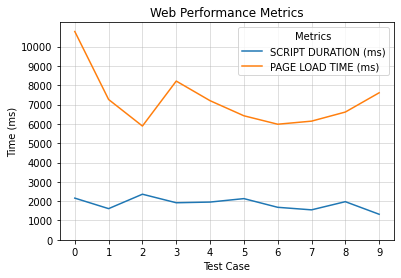

In [3]:
"""Create Series Line Graph with matplotlib."""

plt.figure()
df[COLUMNS].plot()

plt.title("Web Performance Metrics")
plt.xlabel("Test Case")
plt.ylabel("Time (ms)")
plt.legend(loc='best', title='Metrics')

plt.grid(alpha=0.5)    
plt.yticks(range(0, 11000, 1000))
plt.xticks(range(0, len(df)))

plt.show()

In [4]:
""" We can graph on a single data point."""
import plotly.express as px

fig = px.bar(df, x='TEST ID', y='PAGE LOAD TIME (ms)')
fig.show()

In [6]:
"""We can graph on multiple data points"""
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Page Load Time (ms)', x=df['TEST ID'], y=df['PAGE LOAD TIME (ms)']),
    go.Bar(name='Qualiti Scripts Duraction (ms)', x=df['TEST ID'], y=df['SCRIPT DURATION (ms)'])
])

fig.update_layout(barmode='group', title_text='Web Performance Metrics')
fig.show()